<a href="https://colab.research.google.com/github/vaishnavibilla07/Potential_Customer_Prediction/blob/main/Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')


## Data Overview

- Observations
- Sanity checks

# Loading the data

In [ ]:
data=pd.read_csv('/content/ExtraaLearn.csv')

In [ ]:
data.shape

(4612, 15)

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:

print(data.isnull().sum())


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed',
            'last_activity', 'print_media_type1', 'print_media_type2',
            'digital_media', 'educational_channels', 'referral']

# Convert 'Yes'/'No' to 1/0 if applicable
for col in ['print_media_type1', 'print_media_type2', 'digital_media',
            'educational_channels', 'referral']:
    if set(data[col].unique()) == set(['Yes', 'No']):
        data[col] = data[col].map({'Yes': 1, 'No': 0})

# For other categorical columns, use label encoding
le = LabelEncoder()
for col in cat_cols:
    if data[col].dtype == 'object' and not set(data[col].unique()) <= set([0, 1]):
        data[col] = le.fit_transform(data[col])

In [ ]:
le.classes_

array(['Email Activity', 'Phone Activity', 'Website Activity'],
      dtype=object)

In [ ]:
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,2.688415e-16,1.000108,-2.142945,-0.775167,0.364649,0.820575,1.276501
current_occupation,4612.0,7.452298e-01,0.902735,0.000000,0.000000,0.000000,2.000000,2.000000
first_interaction,4612.0,5.511709e-01,0.497429,0.000000,0.000000,1.000000,1.000000,1.000000
profile_completed,4612.0,9.950130e-01,0.988426,0.000000,0.000000,1.000000,2.000000,2.000000
website_visits,4612.0,-2.002831e-17,1.000108,-1.260870,-0.553863,-0.200359,0.506647,9.344233
time_spent_on_website,4612.0,-3.697534e-17,1.000108,-0.973463,-0.773463,-0.467916,0.823853,2.437638
page_views_per_visit,4612.0,-1.078447e-16,1.000108,-1.537735,-0.481920,-0.118972,0.371015,7.829557
last_activity,4612.0,7.445794e-01,0.816910,0.000000,0.000000,1.000000,1.000000,2.000000
print_media_type1,4612.0,1.077624e-01,0.310114,0.000000,0.000000,0.000000,0.000000,1.000000
print_media_type2,4612.0,5.052038e-02,0.219040,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,0.820575,2,1,0,1.213654,1.230240,-0.592062,2,1,0,1,0,0,1
1,EXT002,0.744587,0,0,2,-0.553863,-0.861866,-1.375126,2,0,0,0,1,0,0
2,EXT003,0.440636,0,1,2,-0.200359,-0.529764,-1.500131,2,0,0,1,0,0,0
3,EXT004,0.516624,2,1,0,0.153144,-0.349596,-0.492464,2,0,0,0,0,0,1
4,EXT005,-1.763007,1,1,0,0.153144,-0.166738,7.057165,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   float64
 2   current_occupation     4612 non-null   int64  
 3   first_interaction      4612 non-null   int64  
 4   profile_completed      4612 non-null   int64  
 5   website_visits         4612 non-null   float64
 6   time_spent_on_website  4612 non-null   float64
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   int64  
 9   print_media_type1      4612 non-null   int64  
 10  print_media_type2      4612 non-null   int64  
 11  digital_media          4612 non-null   int64  
 12  educational_channels   4612 non-null   int64  
 13  referral               4612 non-null   int64  
 14  status                 4612 non-null   int64  
dtypes: f

Starting with a dataset of over 4,600 leads, each with various details like age, occupation, how they first interacted, their website activity, marketing exposures, and whether they converted to a customer or not.

The first important step was data cleaning and preprocessing

Verified that none of the columns had missing or null values. This is great because missing data can cause problems in analysis and modeling, and we'd have to decide how to fill or remove those gaps. With no missing values, our dataset is complete and reliable.

Categorical Data Encoding:
Many of the columns, like occupation status, the channel of first interaction, marketing exposure flags, etc., were originally in words or labels. But most machine learning models only work with numbers. So, we converted these categories into numeric codes:

For yes/no flags, we replaced them with 1 and 0.

For other categories (like ‘Professional’, ‘Student’, ‘Unemployed’), we assigned a unique number to each.

Scaling Numerical Features:
Some numeric columns, like age and counts of website visits, had very different ranges. This can confuse models because features with large values might dominate. So, we standardized these numbers — essentially adjusting them so they have a mean of zero and a consistent scale. This helps models treat each feature fairly.

Final Data Structure:
After these steps, the dataset has:

4,612 records (each a lead).

15 columns, all either numeric or numerical codes.

The target column ‘status’ clearly marking converted (1) vs. not converted (0).

Because all features are now numeric and there are no missing values, the dataset is in a great shape for the next steps — such as exploring patterns, building prediction models, and extracting business insights.

In other words, we transformed raw data into a clean, machine-readable format that sets a solid foundation for building effective lead conversion prediction models."

In [ ]:
def hist_box_v2(data, col):
    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])  # Adjusted proportions

    # Boxplot (top)
    ax0 = plt.subplot(gs[0])
    sns.boxplot(data=data, x=col, ax=ax0, color='blue', fliersize=3, linewidth=1.2)
    ax0.set(xlabel='')  # Remove x-label
    ax0.set_title(f"Boxplot & Histogram for '{col}'", fontsize=14)

    # Histogram with KDE (bottom)
    ax1 = plt.subplot(gs[1], sharex=ax0)
    sns.histplot(data=data, x=col, kde=True, color='blue', bins=30)
    ax1.set_xlabel(col, fontsize=12)
    ax1.set_ylabel("Frequency", fontsize=12)

    plt.tight_layout()
    plt.show()


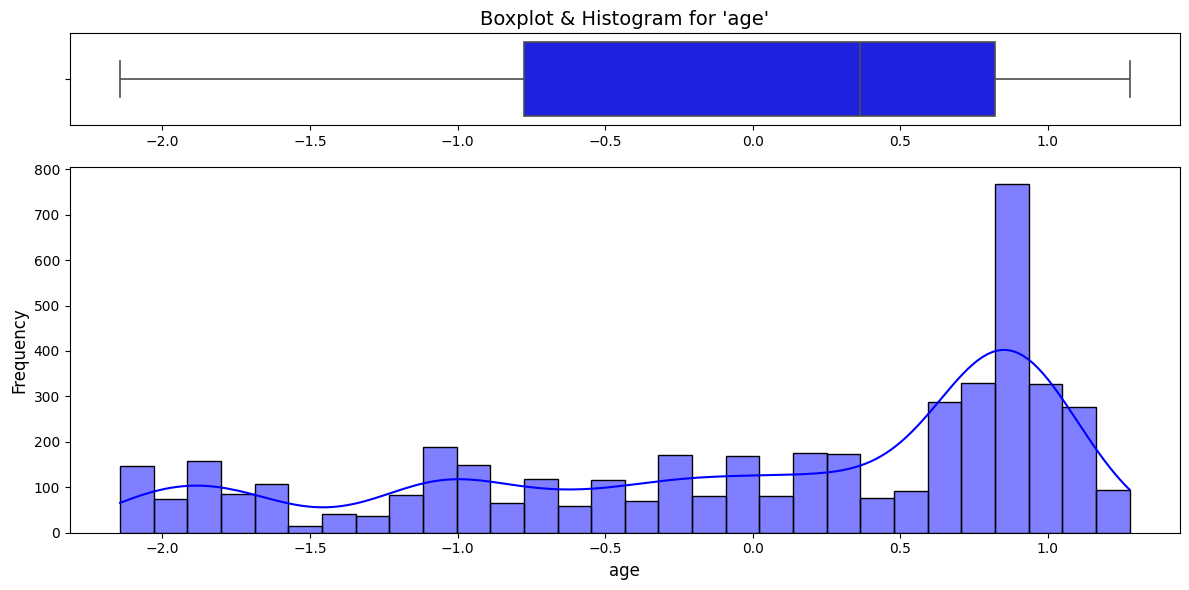

In [ ]:
hist_box_v2(data,'age')

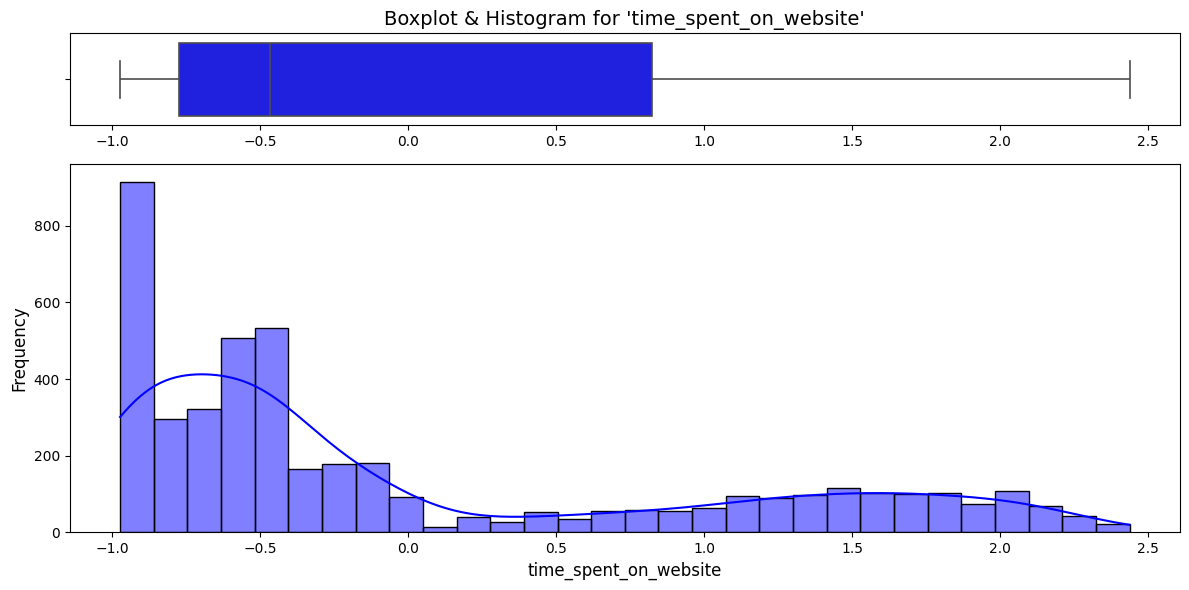

In [ ]:
hist_box_v2(data,'time_spent_on_website')

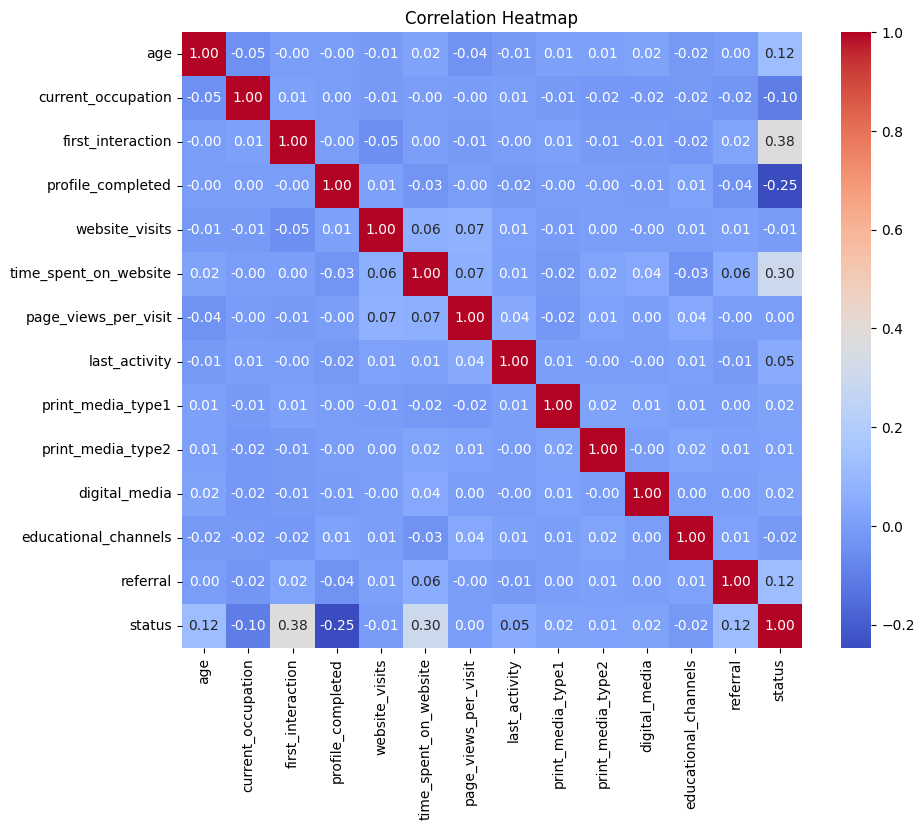

In [ ]:
# Drop the non-numeric 'ID' column before computing correlation
numeric_data = data.drop(columns=['ID'])

# Now generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

Conversion rates by occupation (%):
 status                      0          1
current_occupation                      
0                   64.487768  35.512232
1                   88.288288  11.711712
2                   73.421235  26.578765
All                 70.143105  29.856895


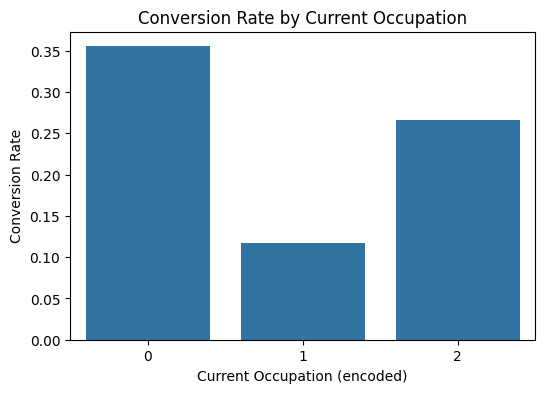

In [ ]:
# Conversion rates by current occupation
occupation_status = pd.crosstab(data['current_occupation'], data['status'], margins=True, normalize='index') * 100
print("Conversion rates by occupation (%):\n", occupation_status)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(
    x=data['current_occupation'],
    y=data['status'],
    estimator=np.mean,
    ci=None
)
plt.title('Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation (encoded)')
plt.ylabel('Conversion Rate')
plt.show()


1. Conversion Rate by Current Occupation
Leads with the occupation code "0" (Professional) have the highest conversion rate, exceeding 35%.

Occupation code "1" (student) shows a notably low conversion rate, around 12%.

Occupation code "2"(unemployed) is intermediate, with a conversion rate close to 27%.




Conversion rates by first interaction channel (%):
 status                     0          1
first_interaction                      
0                  89.468599  10.531401
1                  54.405980  45.594020
All                70.143105  29.856895


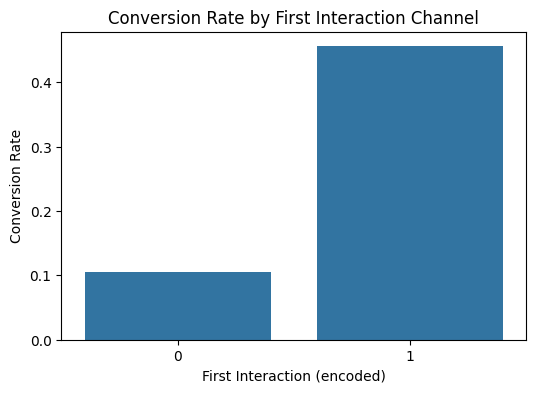

In [ ]:
# Conversion rates by first interaction
first_int_status = pd.crosstab(data['first_interaction'], data['status'], margins=True, normalize='index') * 100
print("Conversion rates by first interaction channel (%):\n", first_int_status)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(
    x=data['first_interaction'],
    y=data['status'],
    estimator=np.mean,
    ci=None
)
plt.title('Conversion Rate by First Interaction Channel')
plt.xlabel('First Interaction (encoded)')
plt.ylabel('Conversion Rate')
plt.show()


2. Conversion Rate by First Interaction Channel
Leads who first interacted through channel "1"(website) have a much higher conversion rate (about 45%) compared to those who started on channel "0" (mobile app)(about 10%).

Insight: Where a lead first engages with the company is a strong predictor of conversion, suggesting particular channels are more effective for your audience.


Conversion rates by last activity (%):
 status                 0          1
last_activity                      
0              69.666374  30.333626
1              78.687196  21.312804
2              61.545455  38.454545
All            70.143105  29.856895


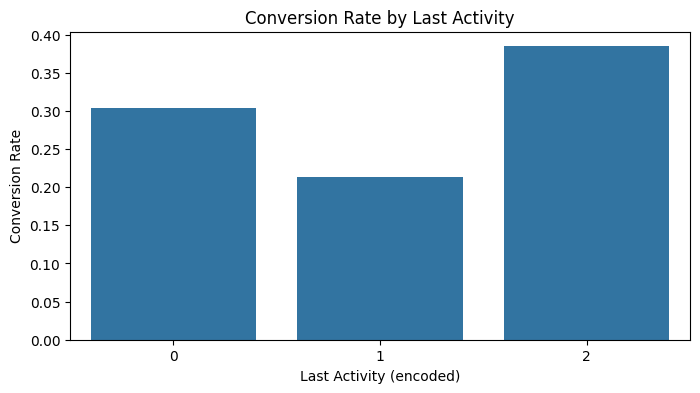

In [ ]:
# Conversion rates by last activity
last_act_status = pd.crosstab(data['last_activity'], data['status'], margins=True, normalize='index') * 100
print("Conversion rates by last activity (%):\n", last_act_status)

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(
    x=data['last_activity'],
    y=data['status'],
    estimator=np.mean,
    ci=None
)
plt.title('Conversion Rate by Last Activity')
plt.xlabel('Last Activity (encoded)')
plt.ylabel('Conversion Rate')
plt.show()


3. Conversion Rate by Last Activity
Leads whose last activity is category "2"(website) demonstrate the highest conversion likelihood (almost 39%).

Category "0"(email) is also strong (about 31%), while category "1"(phone) lags (roughly 22%).

Current occupation clearly influences conversion potential. Professionals may be the most engaged cohort.


The kind of final touchpoint or activity is important; optimizing these high-performing activities may drive more conversions.

What These Plots Suggest
**Current Occupation:** Focus marketing and engagement strategies on the occupation group with the highest conversion rate (professionals). They represent a valuable target audience.

**First Interaction Channel**: Invest in and prioritize the acquisition channel corresponding to code "1"(mobile app)—this channel brings in the most likely-to-convert leads.

**Last Activity:** Enhance or prompt for the most effective kinds of lead activities before conversion, especially those labeled "2"(website) and "0."(email)

Conversion rate by print_media_type1:
print_media_type1
0    29.599028
1    31.991952
Name: status, dtype: float64



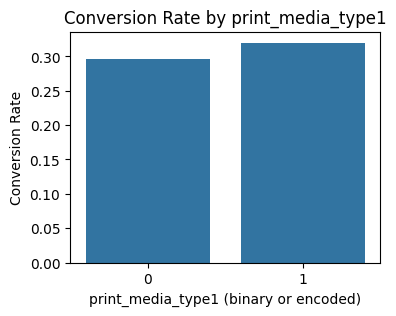

Conversion rate by print_media_type2:
print_media_type2
0    29.732816
1    32.188841
Name: status, dtype: float64



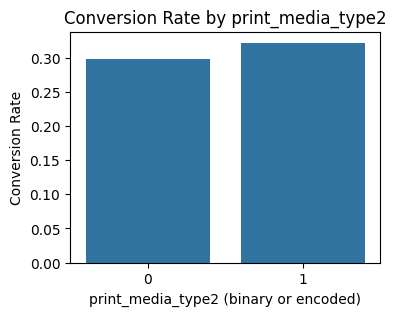

Conversion rate by digital_media:
digital_media
0    29.596083
1    31.878558
Name: status, dtype: float64



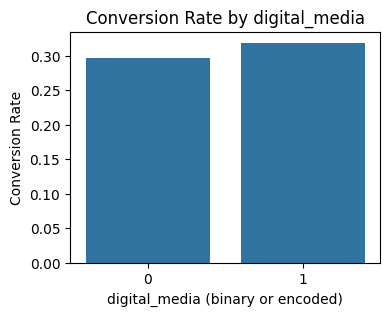

Conversion rate by educational_channels:
educational_channels
0    30.202201
1    27.943262
Name: status, dtype: float64



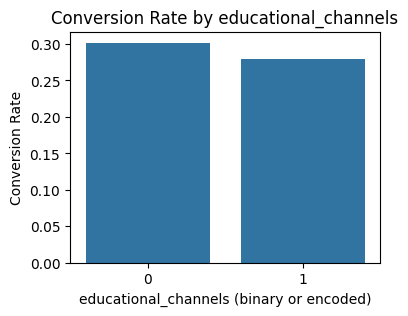

Conversion rate by referral:
referral
0    29.077229
1    67.741935
Name: status, dtype: float64



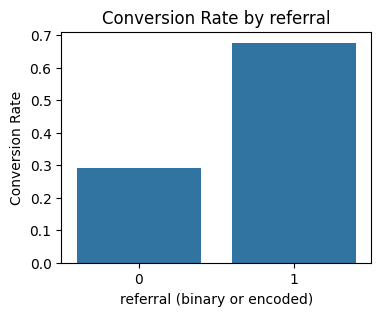

In [ ]:
# List of channels to analyze
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Print conversion rates for each channel
for channel in channels:
    conv_rate = data.groupby(channel)['status'].mean() * 100
    print(f"Conversion rate by {channel}:\n{conv_rate}\n")

    # Bar plot
    plt.figure(figsize=(4,3))
    sns.barplot(x=data[channel], y=data['status'], estimator=np.mean, ci=None)
    plt.title(f'Conversion Rate by {channel}')
    plt.xlabel(f'{channel} (binary or encoded)')
    plt.ylabel('Conversion Rate')
    plt.show()


1. Conversion Rate by print_media_type1
Observation: Leads with value 1 (exposed to this print media type) have a higher conversion rate

Meaning: Exposure to print_media_type1 is correlated with a slightly increased chance of conversion.

Implication: This print media type is effective and worth further investment.

2. Conversion Rate by print_media_type2
Observation: Similar to the above, leads exposed (1) have a higher conversion rate (~0.32 or 32%) compared to those not exposed (0, ~0.30 or 30%).

Meaning: print_media_type2 also adds value and increases the likelihood of conversion.

Implication: This print channel should be continued or expanded in marketing strategies.

3. Conversion Rate by digital_media
Observation: Leads reached through digital_media (1) have a conversion rate of about 32%, higher than those not exposed (about 30%).

Meaning: Digital marketing is a positive driver for conversions.

Implication: Digital campaigns are working. Further optimization here could yield even better results.

4. Conversion Rate by educational_channels
Observation: Here, the relationship is reversed. Leads exposed (1) to educational channels have a lower conversion rate (about 28%) compared to those not exposed (0, about 30%).

Meaning: Educational channels may not be as effective at turning leads into customers in this context.

Implication: You may need to re-evaluate the content, targeting, or cost of these channels, or consider focusing less on them.

Conversion rates by profile completion (%):
 status                     0          1
profile_completed                      
0                  58.215548  41.784452
1                  92.523364   7.476636
2                  81.124498  18.875502
All                70.143105  29.856895


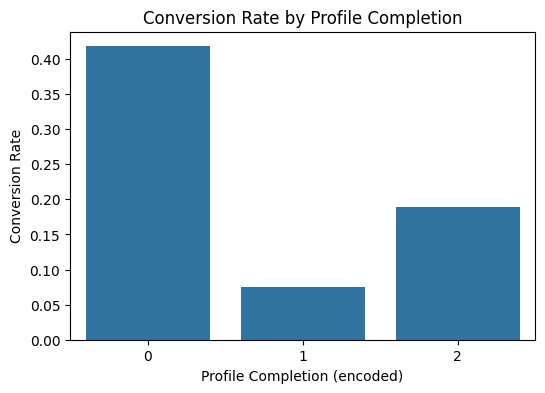

In [ ]:
# Cross-tab of profile_completion vs. status
profile_conv = pd.crosstab(data['profile_completed'], data['status'], margins=True, normalize='index') * 100
print("Conversion rates by profile completion (%):\n", profile_conv)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(
    x=data['profile_completed'],
    y=data['status'],
    estimator=np.mean,
    ci=None
)
plt.title('Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion (encoded)')
plt.ylabel('Conversion Rate')
plt.show()


"0": High - (0-50%),
"1": Low - (50-75%),
"2": Medium - (75-100%)



## EDA

- It is a good idea to explore the data once again after manipulating it.

1. Relationship with Conversion Status
First Interaction shows the strongest positive correlation with conversion status (0.38). This suggests that the channel where a lead first interacts (such as website or mobile app) significantly impacts the likelihood of conversion.

Time Spent on Website is moderately correlated (0.30) with conversion, indicating that leads spending more time on the platform are likelier to convert.

Profile Completed has a negative correlation with conversion (-0.25), which can be counterintuitive. But depending on how completion is encoded, it may indicate that higher (or lower) levels of completion are associated with lower conversion, or vice versa. Double-check your encoding for accurate business interpretation.

Age and referral have weak positive correlations with conversion (0.12), suggesting a slight tendency for older leads and those referred through certain channels to convert.

2. Feature Relationships
Most feature-to-feature correlations are very low (close to zero), indicating little to no multicollinearity among the variables. This is generally favorable for modeling, as it means features give mostly independent signals.

Some moderate associations:

First Interaction and Status are moderately related, reinforcing the importance of engagement channels.

Profile Completed and First Interaction have some negative relationship (-0.25).

3. Practical Implications
Optimize acquisition channels. Focus on and invest in the first interaction channels (such as mobile app or website) that show strong links to conversions.

Website engagement matters. Increasing the time visitors spend on site could directly lift conversion rates.


## Building a Decision Tree model

In [ ]:
X = data.drop(columns=['ID', 'status'])
y = data['status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.791907514450867
Precision: 0.6379690949227373
Recall: 0.6997578692493946
F1-score: 0.6674364896073903
Confusion Matrix:
 [[807 164]
 [124 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       971
           1       0.64      0.70      0.67       413

    accuracy                           0.79      1384
   macro avg       0.75      0.77      0.76      1384
weighted avg       0.80      0.79      0.79      1384



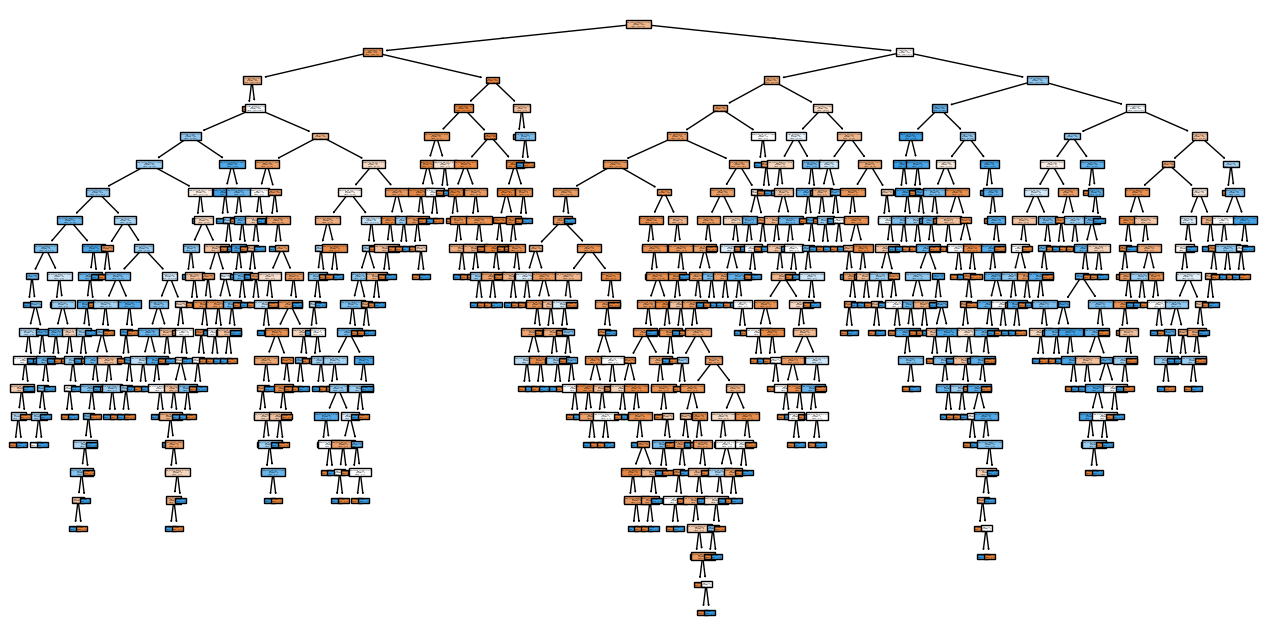

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Replace clf with your trained DecisionTreeClassifier or DecisionTreeRegressor
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(16,8)) # set the size as you prefer
tree.plot_tree(dtree, feature_names=feature_names, filled=True)
plt.show()


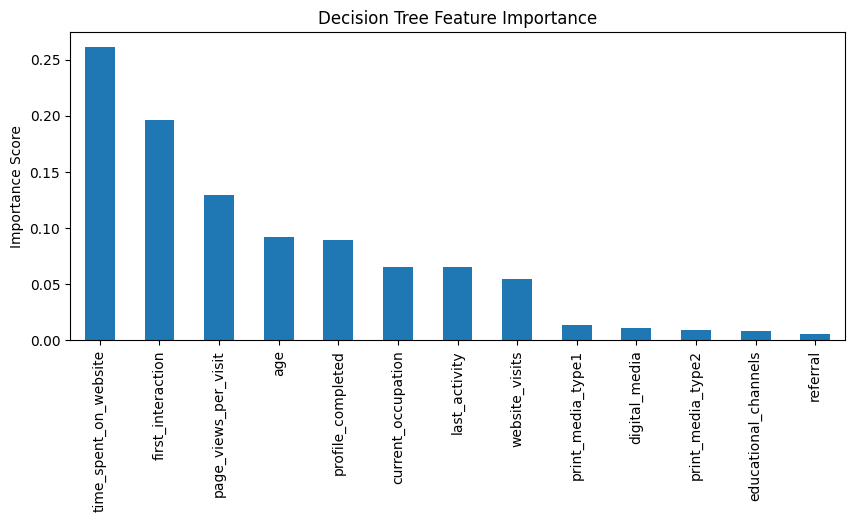

In [ ]:
importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
y_train_pred = dtree.predict(X_train)

# Evaluate training set performance
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

Training Set Metrics:
Accuracy: 0.9996902106567535
Precision: 1.0
Recall: 0.9989626556016598
F1-score: 0.9994810586403736
Confusion Matrix:
 [[2264    0]
 [   1  963]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



training accuracy is almost perfect (~99.97%) while your test accuracy is around 79%.

Training precision, recall, and F1-score are all near 1.0 (perfect), but the test set metrics are noticeably lower.

This large gap strongly indicates overfitting: the decision tree is fitting the training data very closely (including noise or intricacies) and not generalizing well to new unseen data.

## Do we need to prune the tree?

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor

# Example: setting limits to reduce complexity
clf = DecisionTreeClassifier(
    max_depth=3,          # the maximum depth of the tree (try a small number, like 3–6)
    min_samples_split=20, # minimum samples required to split a node (try 5, 10, etc.)
    min_samples_leaf=10    # minimum samples required at a leaf node (try 2, 5, etc.)
)

clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20)

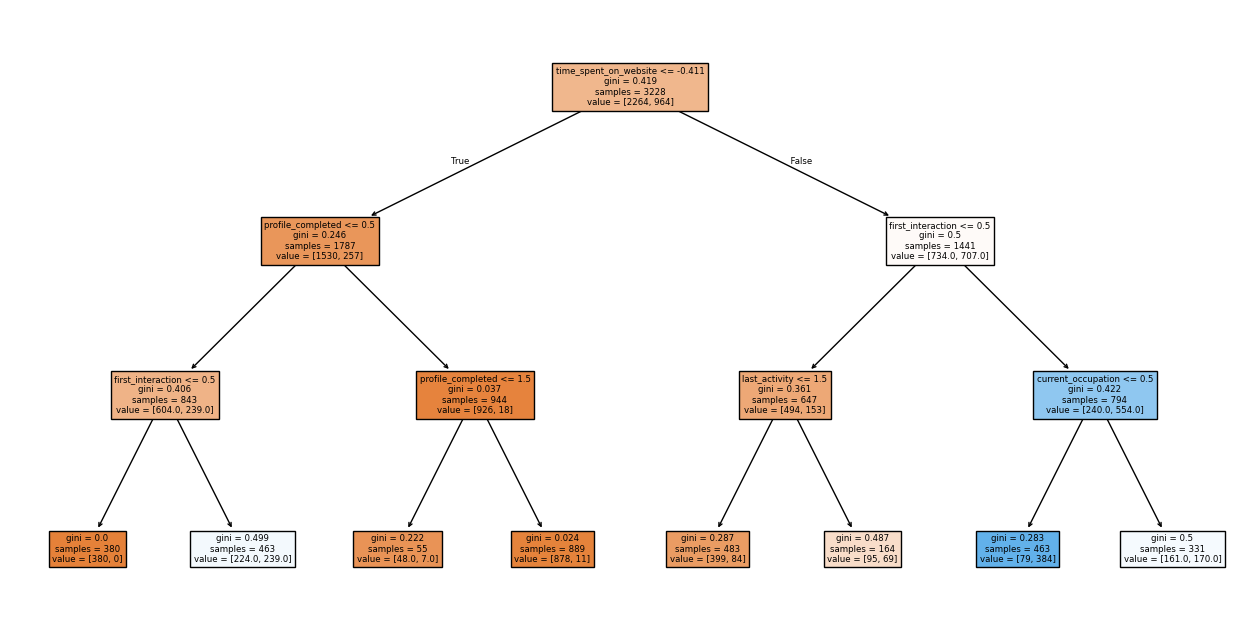

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Replace clf with your trained DecisionTreeClassifier or DecisionTreeRegressor
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(16,8)) # set the size as you prefer
tree.plot_tree(clf, feature_names=feature_names, filled=True)
plt.show()


In [ ]:

dtree_pruned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dtree_pruned.fit(X_train, y_train)

# Evaluate on test and train sets again
y_train_pred = dtree_pruned.predict(X_train)
y_test_pred = dtree_pruned.predict(X_test)

print("Pruned Tree Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Pruned Tree Test Accuracy:", accuracy_score(y_test, y_test_pred))

Pruned Tree Training Accuracy: 0.8605947955390335
Pruned Tree Test Accuracy: 0.8460982658959537


This indicates that pruning has reduced overfitting by simplifying the model, allowing it to perform better on unseen data. The smaller gap between train and test accuracies also shows better balance between bias and variance.
The pruned tree is less complex and less likely to memorize quirks of the training set.

While training accuracy decreased (expected when reducing model complexity), the rise in test accuracy suggests better real-world performance.

This is a good sign that pruning was effective and improved model robustness.

## Building a Random Forest model

Random Forest Test Accuracy: 0.8533236994219653
Precision: 0.7777777777777778
Recall: 0.711864406779661
F1-score: 0.7433628318584071
Confusion Matrix:
 [[887  84]
 [119 294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



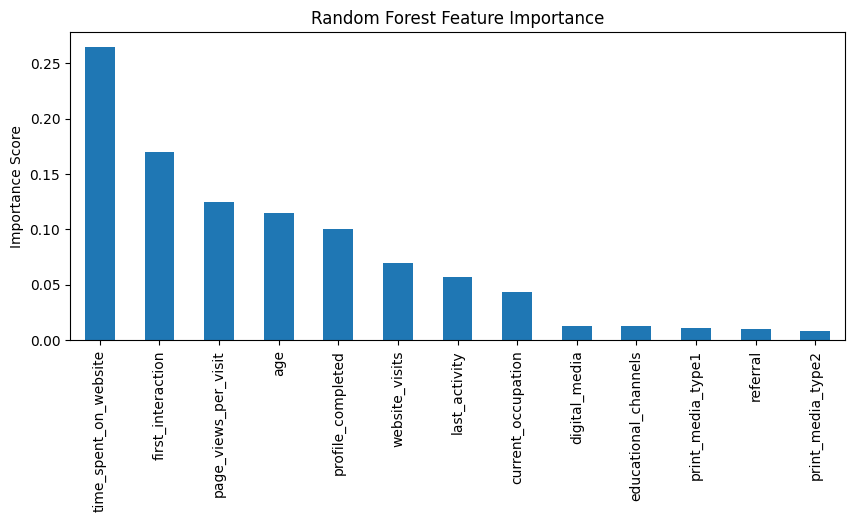

In [ ]:
# Define features and target with new variable names
X1 = data.drop(columns=['ID', 'status'])
y1 = data['status']

# Split into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42, stratify=y1
)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X1_train, y1_train)

# Predict on test set
y1_pred = rf.predict(X1_test)

# Evaluate performance
print("Random Forest Test Accuracy:", accuracy_score(y1_test, y1_pred))
print("Precision:", precision_score(y1_test, y1_pred))
print("Recall:", recall_score(y1_test, y1_pred))
print("F1-score:", f1_score(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X1.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance Score')
plt.show()


Random Forest model shows solid performance on the test set with:

Accuracy: 85.33%

Precision (Class 1 - Converted): 77.78%

Recall (Class 1): 71.19%

F1-score (Class 1): 74.34%

True negatives and positives are well balanced, with a confusion matrix indicating 887 correct non-converted predictions and 294 correct converted predictions.

Interpretation:
The model is better balanced and more accurate overall than the previous Decision Tree model.

Precision and recall for the converted class are reasonably strong, showing good ability to identify true converters with fewer false positives and a decent catch rate.

Compared to the Decision Tree, Random Forest’s ensemble nature has improved generalization, reducing overfitting as expected.



## Do we need to prune the tree?

No, you do not need to manually prune a Random Forest model like you do with a single Decision Tree.

Key Reasons
Random Forests are ensembles of multiple decision trees. Each tree is built from subsets of the data and features, and the final model output is an averaged (or majority vote) prediction. This structure naturally reduces overfitting and variance.

Overfitting is less common in Random Forests because they use many shallow trees and randomization (bagging/subsampling), which regularizes the ensemble automatically.

Pruning individual trees in a Random Forest is unnecessary and can actually harm model performance, since the trees are intentionally allowed to be deep to capture complex patterns, but their errors are averaged out.



## Actionable Insights and Recommendations

1. Focus on High-Potential Lead Segments
Target leads in high-impact occupations (e.g., professionals), as they show superior conversion rates.

Prioritize leads with strong engagement metrics: fast-track those logging more website visits and higher time spent on site for tailored nurturing.

2. Optimize First Interaction Channels
Invest in effective acquisition channels (website/app). Conversion likelihood is significantly influenced by where a lead first engages. Allocate more marketing resources to these high-performing entry points.

3. Enhance Closing Touchpoints
Replicate high-performing last activities. Track and encourage user actions that commonly precede conversions to boost final-stage engagement among undecided leads.

4. Refine Marketing Channel Strategies
Expand digital and print efforts: Leads exposed to print media (types 1 & 2) and digital campaigns convert at higher rates—focus investment accordingly.

Critically assess educational channels: Leads entering via educational campaigns convert less; adjust targeting, content, or consider reallocating resources.

5. Promote Profile Completion
Encourage leads to complete their profiles. Deep profile completion generally boosts conversion; use incentives or progress nudges to maximize detail provided by prospects.

6. Use Model-Driven Lead Scoring
Deploy the Random Forest model for lead scoring. Use model outputs to rank and prioritize leads, enhancing sales team effectiveness in targeting those most likely to convert.

7. Establish Ongoing Monitoring and Tuning
Regularly revisit model feature importance and performance. Conduct cross-validation and retrain models as new data arrives to maintain predictive accuracy.

Adapt marketing tactics as insights and customer behaviors evolve, using ongoing analysis to stay aligned with key drivers.

8. Communicate Findings Clearly
Report and visualize key drivers: Share occupation, engagement, and channel insights in clear language and visuals with business and sales teams, ensuring actionable understanding for all stakeholders.